<hr style="border:5px solid #141F31"> </hr>

# 365 DataScience The elbow method for K-Means clustering Python

<hr style="border:4.5px solid #141F31"> </hr>

## Step 1 Import the libraries

In [1]:
# Data manipulation
import pandas as pd

# The KMeans module will perform the clustering with
from sklearn.cluster import KMeans

# Main visualization module
import matplotlib.pyplot as plt

# Seaborn's style on top of matplotlib
import seaborn as sns
# Override the default matplotlib styles with those of seaborn
sns.set()

## Step 2 Load the data

In [2]:
# Load the data from a .csv file located in the same folder as the notebook
data = pd.read_csv('Latitude and Longitude - clustering.csv', sep = ',')

In [3]:
# Display the data
data

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Step 3 Visualize the data

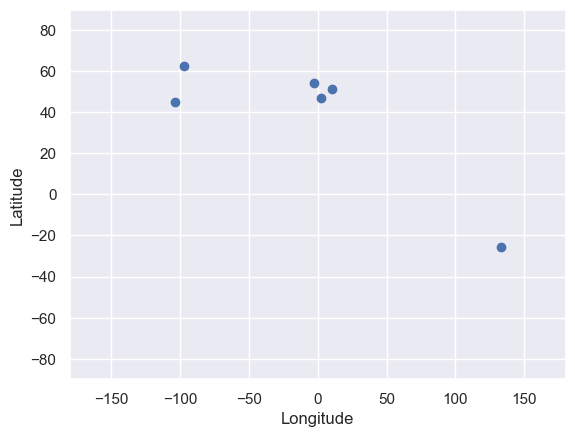

In [4]:
# Create a scatter plot of Latitude versus Longitude
# Note that in order to obtain a result resembling a world map, we must use Longitude as the x-component, 
# and Latitude as the y-component
plt.scatter(data['Longitude'], data['Latitude'])

# Name the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set limits on the axes
plt.xlim(-180,180)
plt.ylim(-90,90);

## Step 4 Calculate the WCSS for different cluster solutions

In [5]:
# Create an empty list storing the within-cluster sum of squares (WCSS) for each model.
# It gives a very good idea about the different distance between different clusters 
# and within clusters, thus providing us a rule for deciding the appropriate value for K.
wcss=[]

# Try K-values ranging from 1 to 6 inclusive.
# Note that K = 6 means that each point is a cluster by itself.
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    
    # Fit the data
    kmeans.fit(data)
    
    # Find the WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

c:\Users\sasi virat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sasi virat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sasi virat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sasi virat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

## Step 4 Apply the Elbow Method

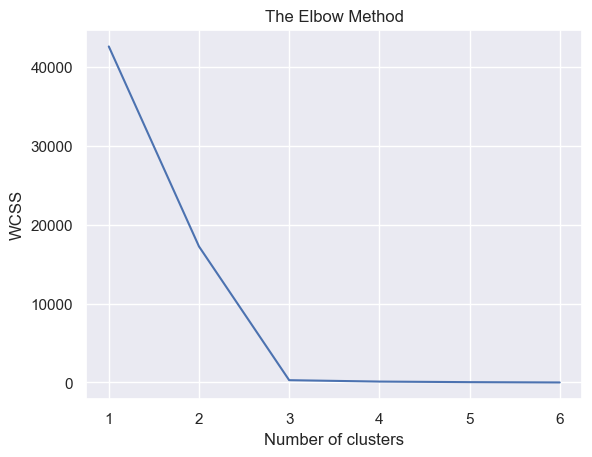

In [6]:
# Create a variable containing the numbers from 1 to 6
number_clusters = range(1,7)

# Plot the number of clusters vs the WCSS
# From the plot, we can see that K = 3 is the most optimal solution.
# A K-value larger than 3 does not improve the model in any way.
plt.plot(number_clusters, wcss)

# Name the plot
plt.title('The Elbow Method')

# Name the x- and y-axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

## Step 5 Perform the clustering using the most optimal K-value

In [7]:
# Create an instance of the 'KMeans()' class
# The number in the parentheses is K i.e., the number of clusters
kmeans = KMeans(3)

In [8]:
# Fit the data
kmeans.fit(data)

c:\Users\sasi virat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## Step 6 Summarize the results

In [9]:
# Output the predicted clusters for each observation
kmeans.fit_predict(data)

c:\Users\sasi virat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 0, 0, 0, 2])

In [10]:
# Create a copy of the original data
data_with_clusters = data.copy()

# Create a new column containing the identified cluster for each observation
data_with_clusters['Cluster'] = kmeans.fit_predict(data)
data_with_clusters

c:\Users\sasi virat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Latitude,Longitude,Cluster
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,1
4,51.15,10.40,1
5,-25.45,133.11,2


## Step 7 Visualize the clusters

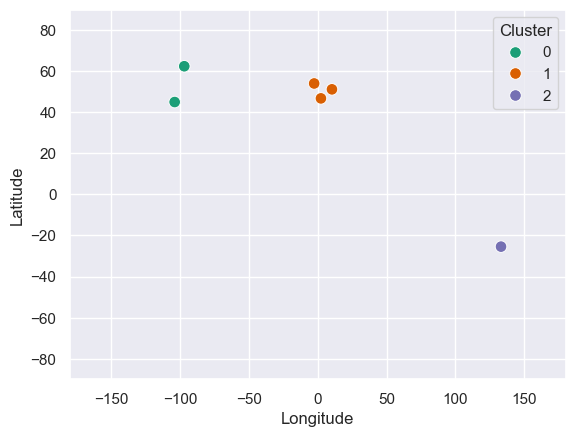

In [11]:
# We have successfully clustered six countries based on their geographical location.
# The three clusters represent three different continents - North America, Europe and Australia.

# Using seaborn's 'scatterplot()' method is the easiest way to visualize the clusters.
# With the help of the 'hue' parameter, the points are colored based on the class they have been assigned to.
# The 's' parameter controls the size of the points
sns.scatterplot(x = 'Longitude', y = 'Latitude', 
                hue = 'Cluster', 
                data = data_with_clusters, 
                palette = 'Dark2', 
                s = 70)

# Set limits of the axes
plt.xlim(-180,180)
plt.ylim(-90,90);

<a href="https://365datascience.com/resources-center/offer/?utm_medium=web&utm_source=rs&utm_campaign=web-rs-the-elbow-method-for-k-means-clustering-in-python&utm_content=the-elbow-method-for-k-means-clustering-in-python&utm_term=t">Start your 365 Journey!</a>